# Analysis of Developer Salaries

This notebook contains analysis of factors associated with developer salaries based on results of StackOverflow survey from 2023.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('survey_results_public.csv')

In [3]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [4]:
def calculate_non_missing_percentage(df):
    """
    Calculates the percentage of non-missing values for each column in the DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A DataFrame with columns and their non-missing value percentages.
    """
    non_missing_percentage = (df.notnull().mean() * 100).reset_index()
    non_missing_percentage.columns = ['Column', 'Non-Missing Percentage']
    return non_missing_percentage

# Example usage
non_missing_table = calculate_non_missing_percentage(df)
print(non_missing_table)

                 Column  Non-Missing Percentage
0            ResponseId              100.000000
1                  Q120              100.000000
2            MainBranch              100.000000
3                   Age              100.000000
4            Employment               98.558037
..                  ...                     ...
79     ProfessionalTech               46.850332
80             Industry               41.233854
81         SurveyLength               96.973672
82           SurveyEase               97.051041
83  ConvertedCompYearly               53.842618

[84 rows x 2 columns]


# Which factors explain the compensation of developers?

The hypothesis is that developers' salaries are shaped by factors including tenure, diversity of technologies they worked with in the past, the size of the company, the country they live in, their use of AI, their educational level and the type of work (remote vs in-person). All these factors will be investigated in turn for their associative link with compensations.

## Question 1. What is the role of organization size in shaping compensation? Is there a premium to working in larger companies?

First, let's see whether there is a premium attached to the company size. For that, we need to calculate average salaries by company size, then medians by company size, then run the tests of differences in means between the groups.

                                             OrgSize  Count  Percentage
0                                 20 to 99 employees  13380   20.571007
1                               100 to 499 employees  12218   18.784496
2                           10,000 or more employees   7929   12.190397
3                           1,000 to 4,999 employees   7235   11.123411
4                                   2 to 9 employees   6439    9.899605
5                                 10 to 19 employees   5254    8.077733
6                               500 to 999 employees   4472    6.875452
7  Just me - I am a freelancer, sole proprietor, ...   4196    6.451117
8                           5,000 to 9,999 employees   2677    4.115739
9                                       I don’t know   1243    1.911043


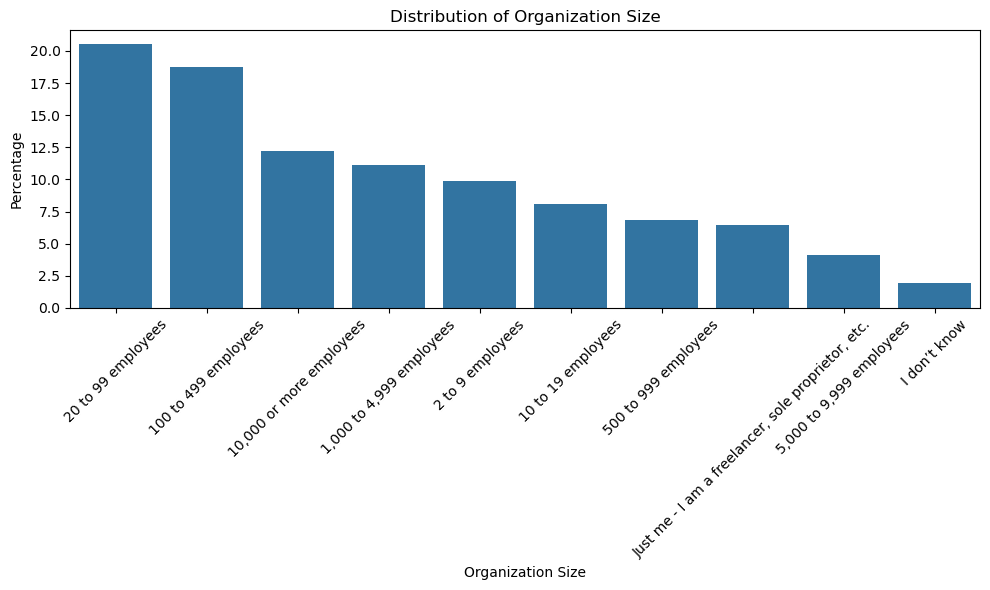

In [5]:
orgsize_distribution = df['OrgSize'].value_counts().reset_index()
orgsize_distribution.columns = ['OrgSize', 'Count']
orgsize_distribution['Percentage'] = (orgsize_distribution['Count'] / orgsize_distribution['Count'].sum()) * 100
print(orgsize_distribution)

plt.figure(figsize=(10, 6))
sns.barplot(x='OrgSize', y='Percentage', data=orgsize_distribution)
plt.title('Distribution of Organization Size')
plt.xlabel('Organization Size')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()


Now let's calculate mean and median salary by OrgSize.

                                             OrgSize    Mean Salary  \
2                           10,000 or more employees  150057.921463   
6                           5,000 to 9,999 employees  113677.052351   
0                           1,000 to 4,999 employees  105666.268853   
7                               500 to 999 employees   98619.449275   
3                               100 to 499 employees   91449.094242   
9  Just me - I am a freelancer, sole proprietor, ...  158143.238072   
5                                 20 to 99 employees   88320.452085   
8                                       I don’t know   85826.891753   
1                                 10 to 19 employees   72292.481472   
4                                   2 to 9 employees   96851.132469   

   Median Salary  Standard Deviation  
2       107749.0        9.652900e+05  
6        90000.0        9.770465e+04  
0        81388.0        1.068762e+05  
7        78956.0        1.902391e+05  
3        77021.0       

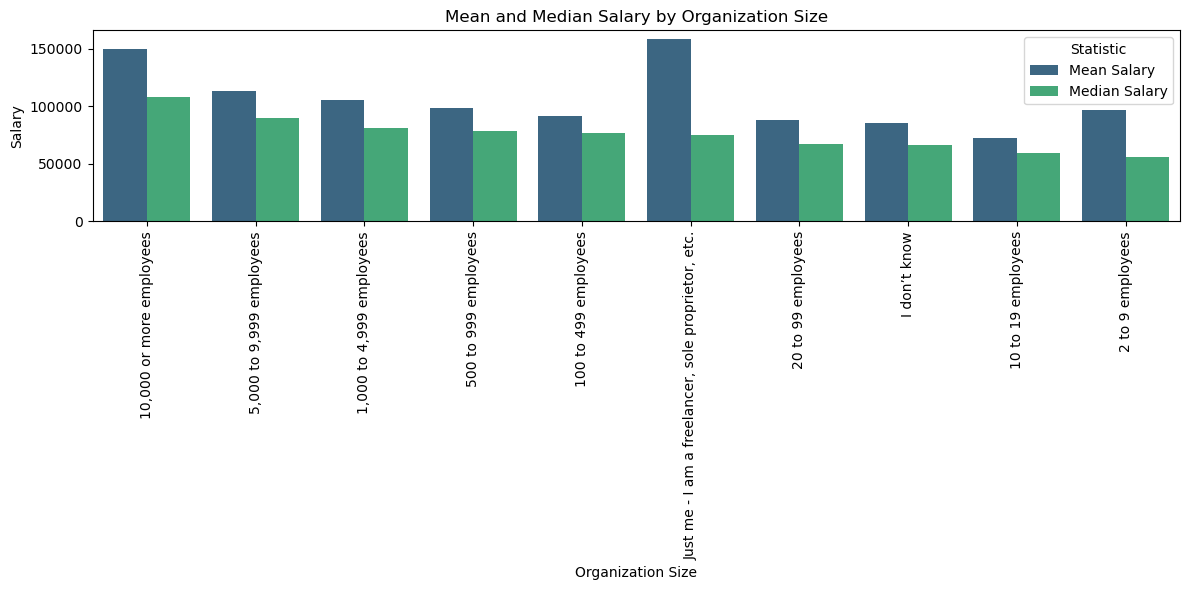

In [6]:
salary_stats = df.groupby('OrgSize')['ConvertedCompYearly'].agg(['mean', 'median', 'std']).reset_index()
salary_stats.columns = ['OrgSize', 'Mean Salary', 'Median Salary', 'Standard Deviation']
salary_stats = salary_stats.sort_values(by='Median Salary', ascending=False)

print(salary_stats)
salary_stats_melted = salary_stats.melt(id_vars='OrgSize', value_vars=['Mean Salary', 'Median Salary'], 
                                        var_name='Statistic', value_name='Salary')
# Plot mean and median salary side by side
plt.figure(figsize=(12, 6))
sns.barplot(data=salary_stats_melted, x='OrgSize', y='Salary', hue='Statistic', palette='viridis')
plt.title('Mean and Median Salary by Organization Size')
plt.xlabel('Organization Size')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.legend(title='Statistic')
plt.tight_layout()
plt.show()


As we can see, there is a monotonic positive relationship between the size of the organization and median salary. Now let's run tests of cross-sample mean differences.

In [19]:
from itertools import combinations
from scipy.stats import ttest_ind

df_filtered = df[['OrgSize', 'ConvertedCompYearly']].dropna()
org_groups = df_filtered['OrgSize'].unique()
t_test_results = []
for org1, org2 in combinations(org_groups, 2):
    group1 = df_filtered[df_filtered['OrgSize'] == org1]['ConvertedCompYearly']
    group2 = df_filtered[df_filtered['OrgSize'] == org2]['ConvertedCompYearly']
    t_stat, p_value = ttest_ind(group1, group2)
    t_test_results.append({'Org1': org1, 'Org2': org2, 't-statistic': t_stat, 'p-value': p_value})

t_test_df = pd.DataFrame(t_test_results)
t_test_df['Significant'] = t_test_df['p-value'] < 0.05
print(t_test_df)

                                                 Org1  \
0                                    2 to 9 employees   
1                                    2 to 9 employees   
2                                    2 to 9 employees   
3                                    2 to 9 employees   
4                                    2 to 9 employees   
5                                    2 to 9 employees   
6                                    2 to 9 employees   
7                                    2 to 9 employees   
8                                    2 to 9 employees   
9                            5,000 to 9,999 employees   
10                           5,000 to 9,999 employees   
11                           5,000 to 9,999 employees   
12                           5,000 to 9,999 employees   
13                           5,000 to 9,999 employees   
14                           5,000 to 9,999 employees   
15                           5,000 to 9,999 employees   
16                           5,

## Question 2. Is there a discount attached to remote work?

Now let's see whether there is a relationship between salary and remote work. One may expect there to be a discount attached to remote work due to possible lower productivity.

                             RemoteWork    Mean Salary  Median Salary  \
2                                Remote  112141.268001        87681.0   
0  Hybrid (some remote, some in-person)  100216.214934        72714.0   
1                             In-person   70646.002145        51953.0   

   Standard Deviation  
2       577214.545154  
0       689010.826206  
1       163790.673948  


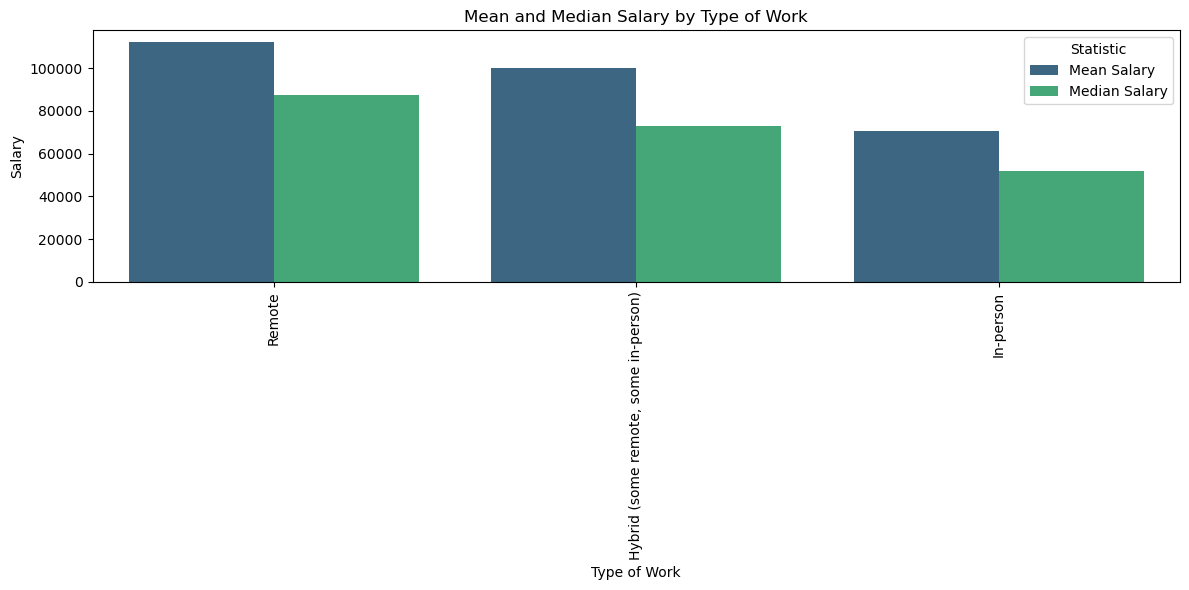

In [7]:
salary_stats_by_type_of_work = df.groupby('RemoteWork')['ConvertedCompYearly'].agg(['mean', 'median', 'std']).reset_index()
salary_stats_by_type_of_work.columns = ['RemoteWork', 'Mean Salary', 'Median Salary', 'Standard Deviation']
salary_stats_by_type_of_work = salary_stats_by_type_of_work.sort_values(by='Median Salary', ascending=False)
print(salary_stats_by_type_of_work)

salary_stats_by_type_of_work_melted = salary_stats_by_type_of_work.melt(id_vars='RemoteWork', value_vars=['Mean Salary', 'Median Salary'], 
                                        var_name='Statistic', value_name='Salary')

# Plot mean and median salary as separate bars
plt.figure(figsize=(12, 6))
sns.barplot(data=salary_stats_by_type_of_work_melted, x='RemoteWork', y='Salary', hue='Statistic', palette='viridis')
plt.title('Mean and Median Salary by Type of Work')
plt.xlabel('Type of Work')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.legend(title='Statistic')
plt.tight_layout()
plt.show()

Interestingly, the highest salaries are observed among the remote workers. Maybe they are the most talented and are rewarded by management with an additional perk.

## Question 3. Is there a premium for experience and how much is it?

Now let's see whether there is a link between the dev's tenure (years of professional coding) and salary.

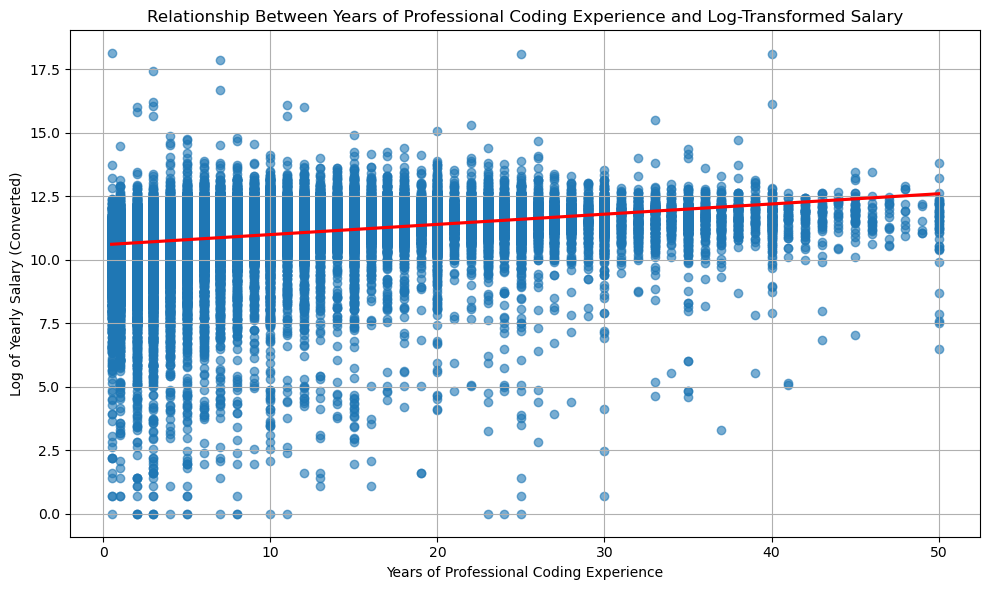

In [29]:
def preprocess_years_code(years_code):
    if years_code == "Less than 1 year":
        return 0.5  # Assign 0.5 for less than a year
    elif years_code == "More than 50 years":
        return 50  # Assign 50 for more than 50 years
    else:
        try:
            return float(years_code)  # Convert numeric strings to float
        except ValueError:
            return None  # Handle invalid entries

df['YearsCodePro'] = df['YearsCodePro'].apply(preprocess_years_code)

df['LogSalary'] = df['ConvertedCompYearly'].apply(lambda x: np.log(x) if x > 0 else None)

# Drop rows with missing or invalid values in YearsCodePro or LogSalary
df_filtered = df[['YearsCodePro', 'LogSalary']].dropna()

plt.figure(figsize=(10, 6))
sns.regplot(data=df_filtered, x='YearsCodePro', y='LogSalary', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Relationship Between Years of Professional Coding Experience and Log-Transformed Salary')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Log of Yearly Salary (Converted)')
plt.grid(True)
plt.tight_layout()
plt.show()

There is an upward trend. More years on the job on average means a higher salary.

## Question 4. What is the premium attached to advanced educational degrees (Bachelor, Master)?

Now let's see whether there is an educational premium to the job these days.

C:\Users\devel\AppData\Local\Temp\ipykernel_38316\3024149507.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


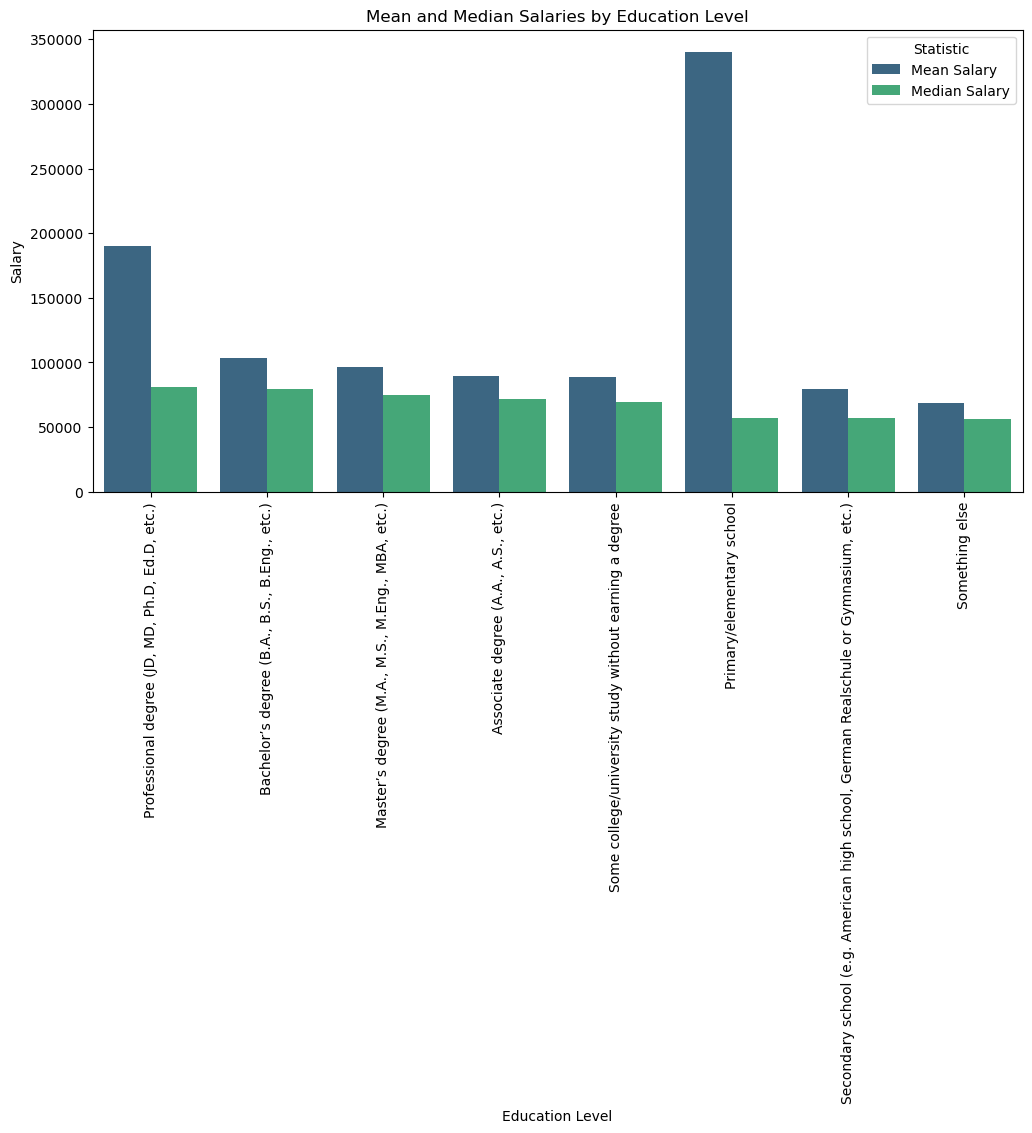

                                             EdLevel    Mean Salary  \
4     Professional degree (JD, MD, Ph.D, Ed.D, etc.)  190433.547236   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)  103270.333363   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   96567.105941   
0                Associate degree (A.A., A.S., etc.)   89411.714912   
6  Some college/university study without earning ...   88592.100990   
3                          Primary/elementary school  340393.324324   
5  Secondary school (e.g. American high school, G...   79802.163209   
7                                     Something else   68804.231855   

   Median Salary  
4        80690.0  
1        79448.0  
2        74963.0  
0        72000.0  
6        69608.0  
3        57331.5  
5        56757.0  
7        56594.5  


In [8]:
education_salary_stats = df.groupby('EdLevel')['ConvertedCompYearly'].agg(['mean', 'median']).reset_index()
education_salary_stats.columns = ['EdLevel', 'Mean Salary', 'Median Salary']

# Sort by median salary in descending order
education_salary_stats = education_salary_stats.sort_values(by='Median Salary', ascending=False)

# Melt the DataFrame for plotting
education_salary_stats_melted = education_salary_stats.melt(id_vars='EdLevel', value_vars=['Mean Salary', 'Median Salary'], 
                                                            var_name='Statistic', value_name='Salary')

# Plot mean and median salaries as separate bars
plt.figure(figsize=(12, 6))
sns.barplot(data=education_salary_stats_melted, x='EdLevel', y='Salary', hue='Statistic', palette='viridis')
plt.title('Mean and Median Salaries by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.legend(title='Statistic')
plt.tight_layout()
plt.show()

print(education_salary_stats)

There is a premium to advanced degrees, but modest. And the difference between a Master's and Bachelor's is quite negligible.

## Question 5. Does the use of AI tools contribute to higher compensation?

Let's see whether there is a growing stratification between developers who do and do not use AI tools. First, let's see how devs use AI.

AIToolCurrently Using
Writing code                     31131
Debugging and getting help       18437
Documenting code                 12963
Learning about a codebase        11350
Testing code                      9000
Project planning                  5097
Committing and reviewing code     3806
Deployment and monitoring         1788
Collaborating with teammates      1377
Other (please describe)            579
Name: count, dtype: int64


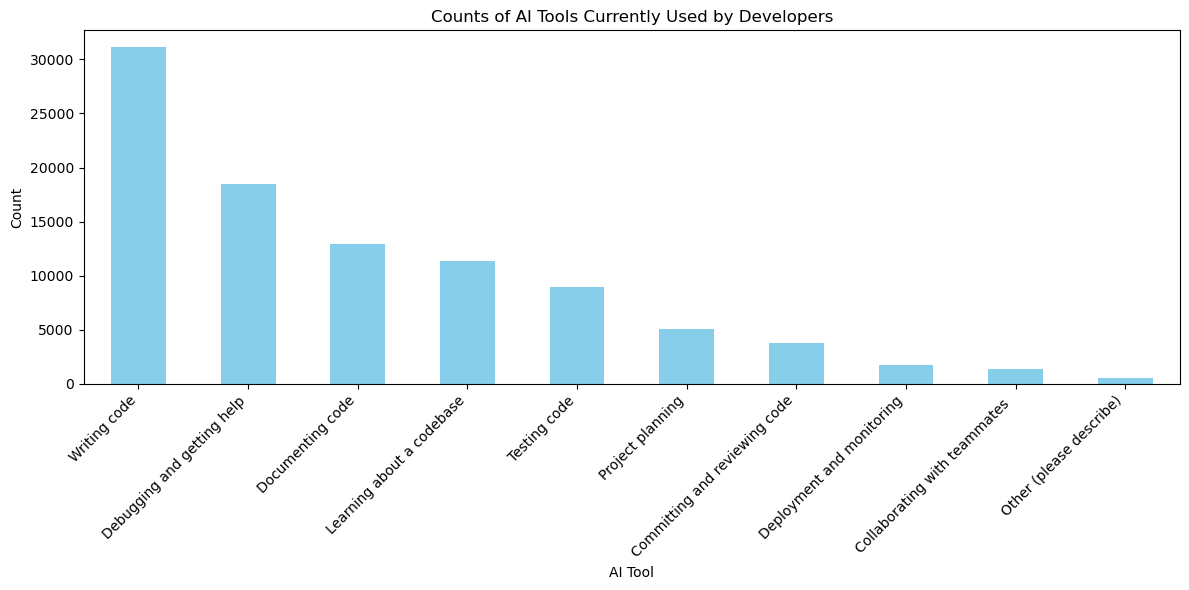

In [9]:
ai_tool_counts = df['AIToolCurrently Using'].dropna().str.split(';').explode().value_counts()

print(ai_tool_counts)

plt.figure(figsize=(12, 6))
ai_tool_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of AI Tools Currently Used by Developers')
plt.xlabel('AI Tool')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [44]:
ai_tool_dummies = df['AIToolCurrently Using'].str.get_dummies(sep=';')
df = pd.concat([df, ai_tool_dummies], axis=1)

In [10]:
ai_tool_dummies = df['AIToolCurrently Using'].str.get_dummies(sep=';')
ai_tool_dummies = ai_tool_dummies.add_prefix('AI_')

# Check for duplicate columns in the original DataFrame
duplicate_columns = set(df.columns).intersection(set(ai_tool_dummies.columns))
if duplicate_columns:
    print(f"Warning: Duplicate columns found: {duplicate_columns}")

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, ai_tool_dummies], axis=1)

# Display the updated DataFrame
print(df.head())

   ResponseId     Q120                      MainBranch              Age  \
0           1  I agree                   None of these  18-24 years old   
1           2  I agree  I am a developer by profession  25-34 years old   
2           3  I agree  I am a developer by profession  45-54 years old   
3           4  I agree  I am a developer by profession  25-34 years old   
4           5  I agree  I am a developer by profession  25-34 years old   

                                          Employment  \
0                                                NaN   
1                                Employed, full-time   
2                                Employed, full-time   
3                                Employed, full-time   
4  Employed, full-time;Independent contractor, fr...   

                             RemoteWork  \
0                                   NaN   
1                                Remote   
2  Hybrid (some remote, some in-person)   
3  Hybrid (some remote, some in-person) 

Now let's see whether there is a link between using AI in a specific way and salaries of devs.

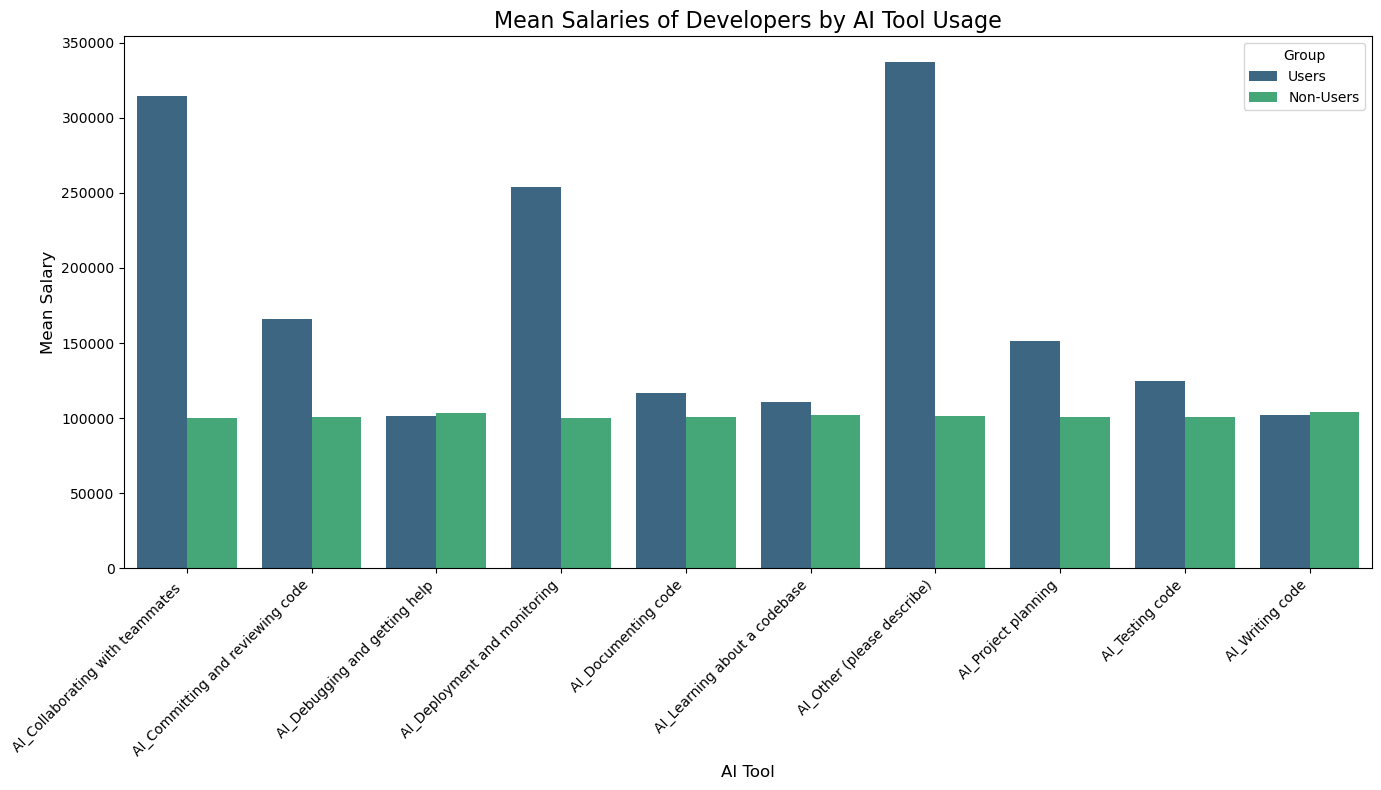

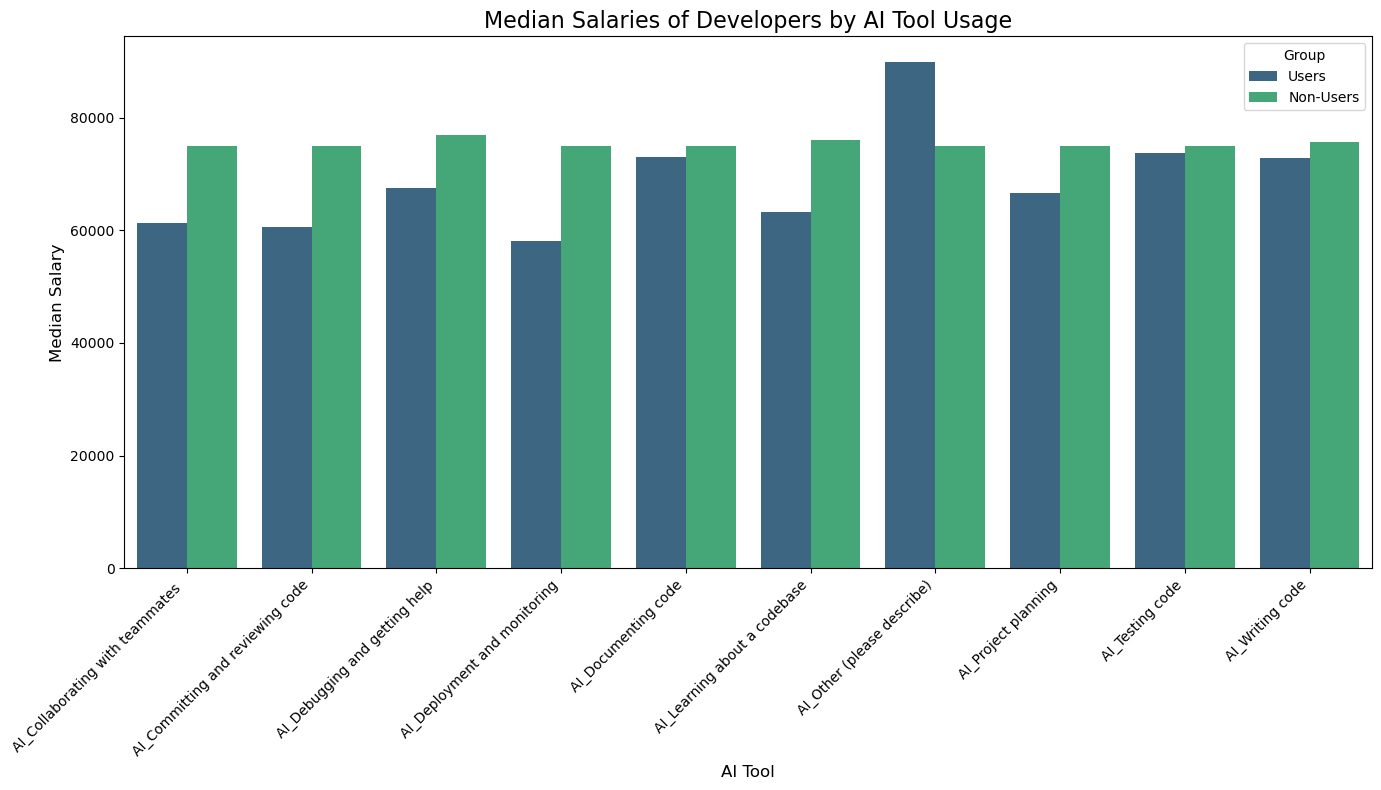

In [11]:
# Initialize a list to store results
ai_salary_stats = []

# Iterate over each AI tool dummy column
for ai_tool in ai_tool_dummies.columns:
    # Calculate mean and median salaries for users and non-users of the AI tool
    mean_salary_users = df[df[ai_tool] == 1]['ConvertedCompYearly'].mean()
    median_salary_users = df[df[ai_tool] == 1]['ConvertedCompYearly'].median()
    mean_salary_non_users = df[df[ai_tool] == 0]['ConvertedCompYearly'].mean()
    median_salary_non_users = df[df[ai_tool] == 0]['ConvertedCompYearly'].median()
    
    # Append results to the list
    ai_salary_stats.append({
        'AI Tool': ai_tool,
        'Group': 'Users',
        'Mean Salary': mean_salary_users,
        'Median Salary': median_salary_users
    })
    ai_salary_stats.append({
        'AI Tool': ai_tool,
        'Group': 'Non-Users',
        'Mean Salary': mean_salary_non_users,
        'Median Salary': median_salary_non_users
    })

# Convert the results to a DataFrame
ai_salary_stats_df = pd.DataFrame(ai_salary_stats)

# Melt the DataFrame for plotting
ai_salary_stats_melted = ai_salary_stats_df.melt(id_vars=['AI Tool', 'Group'], 
                                                 value_vars=['Mean Salary', 'Median Salary'], 
                                                 var_name='Statistic', value_name='Salary')

mean_data = ai_salary_stats_melted[ai_salary_stats_melted['Statistic'] == 'Mean Salary']
median_data = ai_salary_stats_melted[ai_salary_stats_melted['Statistic'] == 'Median Salary']

# Plot mean salaries
plt.figure(figsize=(14, 8))
sns.barplot(data=mean_data, x='AI Tool', y='Salary', hue='Group', palette='viridis')
plt.title('Mean Salaries of Developers by AI Tool Usage', fontsize=16)
plt.xlabel('AI Tool', fontsize=12)
plt.ylabel('Mean Salary', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Group', fontsize=10)
plt.tight_layout()
plt.show()

# Plot median salaries
plt.figure(figsize=(14, 8))
sns.barplot(data=median_data, x='AI Tool', y='Salary', hue='Group', palette='viridis')
plt.title('Median Salaries of Developers by AI Tool Usage', fontsize=16)
plt.xlabel('AI Tool', fontsize=12)
plt.ylabel('Median Salary', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Group', fontsize=10)
plt.tight_layout()
plt.show()

Interestingly, while there is a huge variance is mean salaries, median salaries are higher among non-users.

## Question 6. Is there a relationship between the variety of languages a dev worked with and their compensation?

Now, let's see whether there is a correlation between richness of experience of a given dev and their compensation. Richness of experience is defined as the number of langauges they worked with as a percentage of all langaugaes all survey respondents worked with.

In [19]:
def calculate_experience_richness(df, column_name):
    """
    Calculates the richness of a developer's experience based on the number of languages they have worked with.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the column containing the languages worked with.

    Returns:
        pd.DataFrame: A DataFrame with an additional column 'ExperienceRichness' containing the percentage of unique languages each developer has worked with.
    """
    # Split the languages and explode into individual rows
    all_languages = df[column_name].dropna().str.split(';').explode()
    
    # Get the total number of unique languages
    unique_languages = set(all_languages)
    total_unique_languages = len(unique_languages)
    
    # Calculate the number of languages each developer has worked with
    df['NumLanguagesWorkedWith'] = df[column_name].dropna().apply(lambda x: len(x.split(';')))
    
    # Calculate the percentage of unique languages each developer has worked with
    df['ExperienceRichness'] = (df['NumLanguagesWorkedWith'] / total_unique_languages) * 100
    
    return df, total_unique_languages

# Calculate experience richness
df, total_languages = calculate_experience_richness(df, 'LanguageHaveWorkedWith')

# Display the updated DataFrame and total unique languages
print(f"Total unique languages: {total_languages}")

Total unique languages: 51


In [21]:
correlation = df['ConvertedCompYearly'].corr(df['ExperienceRichness'])
print(f"Correlation between salary and experience richness: {correlation:.2f}")

Correlation between salary and experience richness: 0.05


Interestingly, there is no correlation between the richness of experience and salary. Which raises a question which languages pay the best salary.

In [26]:
df_exploded = df[['LanguageHaveWorkedWith', 'ConvertedCompYearly']].dropna()
df_exploded['Language'] = df_exploded['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df_exploded.explode('Language')

In [28]:
# Group by Language and calculate mean and median salaries
language_salary_stats = df_exploded.groupby('Language')['ConvertedCompYearly'].agg(['mean', 'median']).reset_index()
language_salary_stats = language_salary_stats.sort_values(by='median', ascending=False)

# Display the top languages by mean salary
print(language_salary_stats.head())

   Language           mean    median
50      Zig  428891.523810  103611.0
14   Erlang  278031.415709   99492.5
15       F#  277939.783037   99311.0
40     Ruby  142087.526642   98522.0
8   Clojure  226901.476190   96381.0


C:\Users\devel\AppData\Local\Temp\ipykernel_38316\3584177464.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_languages, x='median', y='Language', palette='viridis')


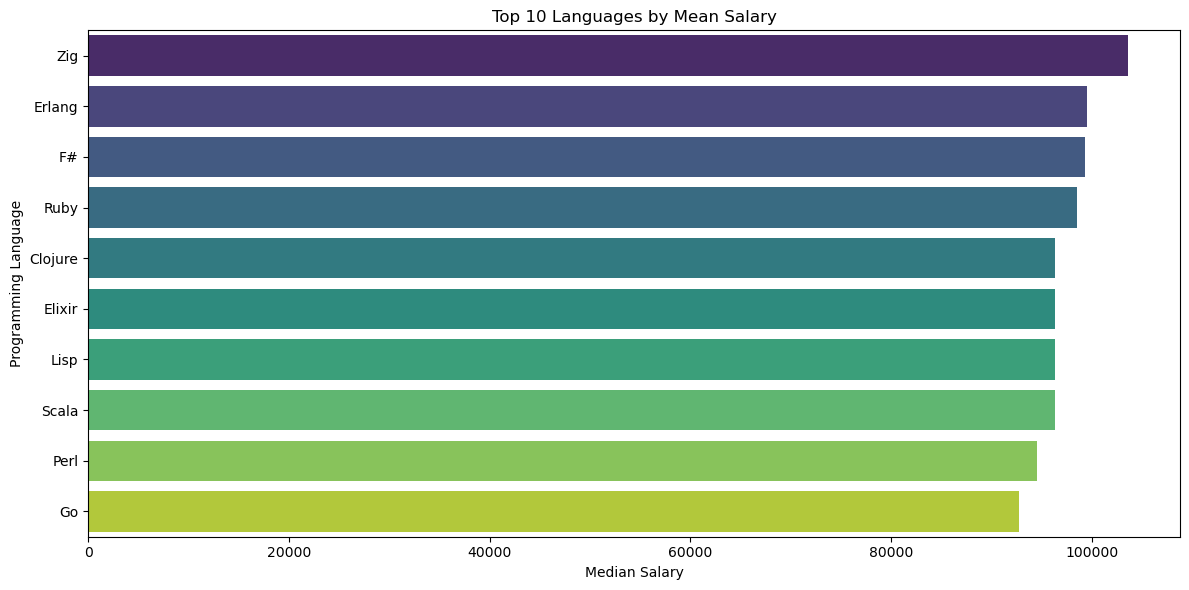

In [29]:
top_languages = language_salary_stats.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_languages, x='median', y='Language', palette='viridis')
plt.title('Top 10 Languages by Mean Salary')
plt.xlabel('Median Salary')
plt.ylabel('Programming Language')
plt.tight_layout()
plt.show()

Best salaries are paid by the 10 langs shown above.

## Summary. Trying to predict dev salaries with factors explored above.

Now let's try predicting devs' salaries with the following factors: years of professional experience, org size, educational level, country and type of work. Let's see what the predictive power will be and what percentage of variance will be explained by those factors.

Mean Squared Error: 0.8076870516687158
R² Score: 0.46412194085233327


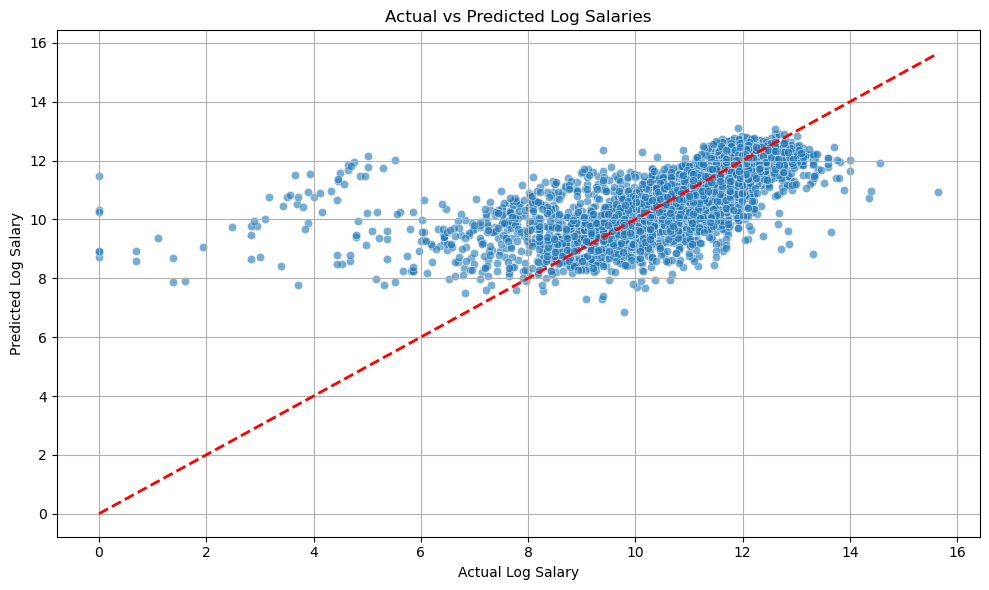

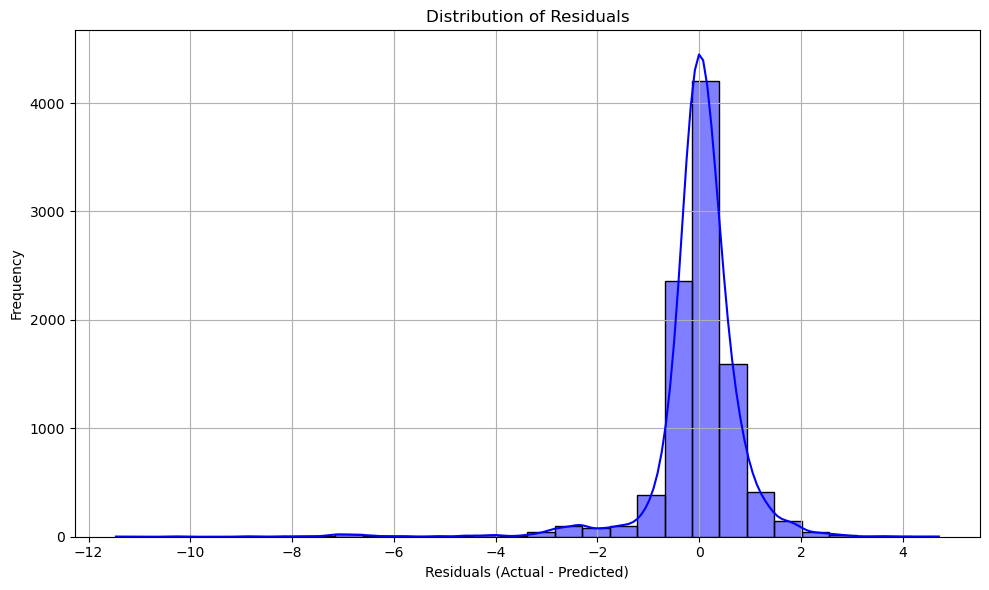

Mean Absolute Error (MAE): 0.5021318898104314


In [18]:
!pip install shap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import shap

# Step 1: Preprocess the data
# Convert YearsCodePro to numeric
def preprocess_years_code(years_code):
    if years_code == "Less than 1 year":
        return 0.5
    elif years_code == "More than 50 years":
        return 50
    else:
        try:
            return float(years_code)
        except ValueError:
            return None
df = df[df['ConvertedCompYearly'].notnull()]  # Remove rows with missing salaries
df = df[df['ConvertedCompYearly'] > 0]   
df['YearsCodePro'] = df['YearsCodePro'].apply(preprocess_years_code)

orgsize_dummies = pd.get_dummies(df['OrgSize'], prefix='OrgSize', drop_first=True)
edlevel_dummies = pd.get_dummies(df['EdLevel'], prefix='EdLevel', drop_first=True)
country_dummies = pd.get_dummies(df['Country'], prefix='Country', drop_first=True)
remotework_dummies = pd.get_dummies(df['RemoteWork'], prefix='RemoteWork', drop_first=True)
coding_activities_dummies = df['CodingActivities'].str.get_dummies(sep=';')
dev_type_dummies = pd.get_dummies(df['DevType'], prefix='DevType', drop_first=True)

X = pd.concat([df[['YearsCodePro']], orgsize_dummies, edlevel_dummies, remotework_dummies, country_dummies, coding_activities_dummies, dev_type_dummies], axis=1)
y = df['ConvertedCompYearly'].apply(lambda x: np.log(x) if x > 0 else None)


data = pd.concat([X, y], axis=1).dropna()
X = data.iloc[:, :-1]  
y = data.iloc[:, -1]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Evaluate accuracy
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

residuals = y_test - y_pred

# Scatterplot: Actual vs Predicted Log Salaries
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Log Salaries')
plt.xlabel('Actual Log Salary')
plt.ylabel('Predicted Log Salary')
plt.grid(True)
plt.tight_layout()
plt.show()

# Histogram: Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate Mean Absolute Error (MAE) for residuals
mae = np.mean(np.abs(residuals))
print(f"Mean Absolute Error (MAE): {mae}")

The R2 of the regression is 0.46. The remaining 54% of variation of salaries is explained my dozens of other factors. Interestingly, adding the richness of experience to the regression causes its explanatory power to decline.